In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
listings_df = pd.read_csv('/content/listings.csv')

In [204]:
pd.set_option('display.max_columns', None)

In [205]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20230309202131,2023-03-10,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone']",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64590,-79.42423,Entire home,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Wifi"", ""Kitchen"", ""First aid kit"", ""Dryer"", ...",$469.00,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2023-03-10,7,0,0,2015-07-19,2017-12-04,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.08
1,8077,https://www.airbnb.com/rooms/8077,20230309202131,2023-03-10,city scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,3.0,"['email', 'phone']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Wifi"", ""Gym"", ""Pool"", ""Free parking on premi...",$104.00,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2023-03-10,169,0,0,2009-08-20,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,NaN,t,2,1,1,0,1.02
2,26654,https://www.airbnb.com/rooms/26654,20230309202131,2023-03-10,city scrape,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,https://www.airbnb.com/users/show/113345,Adela,2010-04-25,"Toronto, Canada",Welcome to Toronto! \r\n\r\nAfter our first me...,within a day,77%,25%,f,https://a0.muscache.com/im/users/113345/profil...,https://a0.muscache.com/im/users/113345/profil...,Entertainment District,3.0,8.0,"['email', 'phone', 'work_email']",t,t,"Toronto, Ontario, Canada",Waterfront Communities-The Island,NaN,43.64608,-79.39032,Entire condo,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Oven"", ""Wifi"", ""Dishwasher"", ""Central air co...",$145.00,28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,0,0,0,221,2023-03-10,41,0,0,2011-01-05,2021-01-31,4.78,4.78,4.78,4.63,

In [206]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17997 entries, 0 to 17996
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17997 non-null  int64  
 1   listing_url                                   17997 non-null  object 
 2   scrape_id                                     17997 non-null  int64  
 3   last_scraped                                  17997 non-null  object 
 4   source                                        17997 non-null  object 
 5   name                                          17995 non-null  object 
 6   description                                   17751 non-null  object 
 7   neighborhood_overview                         9974 non-null   object 
 8   picture_url                                   17997 non-null  object 
 9   host_id                                       17997 non-null 

In [207]:
column_list = listings_df.columns.tolist()

# Print or use the list of columns
print(column_list)


['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

#DATA CLEANING

In [208]:
# After viewing the multiple columns in the listings.csv from the data_description.txt,
# the following variables were picked for further analysis and dropped variables like date_scraped etc.
listingDF = listings_df[['id','name','description','longitude','latitude','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','review_scores_rating','property_type','room_type','accommodates','bathrooms_text','bedrooms','beds','reviews_per_month','amenities','number_of_reviews','price']]
listingDF.head()

,id,name,description,longitude,latitude,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,host_since,host_response_time,review_scores_rating,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,1419,Beautiful home in amazing area!,"This large, family home is located in one of T...",-79.42423,43.64590,f,The apartment is located in the Ossington stri...,Little Portugal,1565,Alexandra,2008-08-08,NaN,5.00,Entire home,Entire home/apt,10,3 baths,5.0,7.0,0.08,"[""Wifi"", ""Kitchen"", ""First aid kit"", ""Dryer"", ...",7,$469.00
1,8077,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,-79.37673,43.64080,t,NaN,Waterfront Communities-The Island,22795,Kathie & Larry,2009-06-22,NaN,4.84,Private room in rental unit,Private room,2,1.5 baths,1.0,1.0,1.02,"[""Wifi"", ""Gym"", ""Pool"", ""Free parking on premi...",169,$104.00
2,26654,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",-79.39032,43.64608,f,There's a reason they call it the Entertainmen...,Waterfront Communities-The Island,113345,Adela,2010-04-25,within a day,4.78,Entire condo,Entire home/apt,4,1 bath,1.0,2.0,0.28,"[""Oven"", ""Wifi"", ""Dishwasher"", ""Central air co...",41,$145.00
3,40456,Downtown- King Size Bed and Parking,---------------------Renovated and Newly Furn...,-79.44010,43.63539,f,This is Nice Neighborhood located in Downtown ...,South Parkdale,174063,Denis,2010-07-20,within an hour,4.63,Entire home,Entire home/apt,5,1 bath,2.0,2.0,0.74,"[""Oven"", ""Wifi"", ""Dishwasher"", ""Outdoor dining...",114,$150.00
4,27423,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",-79.32725,43.66884,f,NaN,South Riverdale,118124,Brent,2010-05-04,NaN,4.92,Entire rental unit,Entire home/apt,1,1 bath,NaN,1.0,0.17,"[""Oven"", ""Baking sheet"", ""Public or shared bea...",27,$45.00


PRICE

In [209]:
# Replace NaN values with 0
listingDF.fillna(0, inplace=True)

# Extract prices from listingDF into priceDF
priceDF = listingDF['price']
# Create an empty prices list
prices=[]

# Rempving the dollar sign and commas(thousand separator) and convert prices into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)

# Replace the price column in the original listingDF with the new prices
listingDF['price'] = prices

<ipython-input-209-c50f176c1e9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF.fillna(0, inplace=True)
<ipython-input-209-c50f176c1e9e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF['price'] = prices


In [210]:
listingDF.head()

,id,name,description,longitude,latitude,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,host_since,host_response_time,review_scores_rating,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,1419,Beautiful home in amazing area!,"This large, family home is located in one of T...",-79.42423,43.64590,f,The apartment is located in the Ossington stri...,Little Portugal,1565,Alexandra,2008-08-08,0,5.00,Entire home,Entire home/apt,10,3 baths,5.0,7.0,0.08,"[""Wifi"", ""Kitchen"", ""First aid kit"", ""Dryer"", ...",7,469.0
1,8077,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,-79.37673,43.64080,t,0,Waterfront Communities-The Island,22795,Kathie & Larry,2009-06-22,0,4.84,Private room in rental unit,Private room,2,1.5 baths,1.0,1.0,1.02,"[""Wifi"", ""Gym"", ""Pool"", ""Free parking on premi...",169,104.0
2,26654,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",-79.39032,43.64608,f,There's a reason they call it the Entertainmen...,Waterfront Communities-The Island,113345,Adela,2010-04-25,within a day,4.78,Entire condo,Entire home/apt,4,1 bath,1.0,2.0,0.28,"[""Oven"", ""Wifi"", ""Dishwasher"", ""Central air co...",41,145.0
3,40456,Downtown- King Size Bed and Parking,---------------------Renovated and Newly Furn...,-79.44010,43.63539,f,This is Nice Neighborhood located in Downtown ...,South Parkdale,174063,Denis,2010-07-20,within an hour,4.63,Entire home,Entire home/apt,5,1 bath,2.0,2.0,0.74,"[""Oven"", ""Wifi"", ""Dishwasher"", ""Outdoor dining...",114,150.0
4,27423,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",-79.32725,43.66884,f,0,South Riverdale,118124,Brent,2010-05-04,0,4.92,Entire rental unit,Entire home/apt,1,1 bath,0.0,1.0,0.17,"[""Oven"", ""Baking sheet"", ""Public or shared bea...",27,45.0


In [211]:
listingDF['bathrooms_text'].value_counts()

1 bath               8974
1 shared bath        2632
2 baths              2310
1 private bath       1670
1.5 baths             789
2.5 baths             357
1.5 shared baths      348
2 shared baths        291
3 baths               203
3.5 baths             157
4.5 baths              52
4 baths                51
0 baths                27
2.5 shared baths       22
3 shared baths         21
Shared half-bath       21
0 shared baths         15
Half-bath              11
5.5 baths              10
5 baths                10
6 baths                 7
0                       5
4.5 shared baths        4
3.5 shared baths        3
6.5 baths               3
Private half-bath       3
8.5 baths               1
Name: bathrooms_text, dtype: int64

In [212]:
# Clean and transform the bathrooms_text column
listingDF['bathrooms_text'] = listingDF['bathrooms_text'].str.replace(' shared', '').str.replace(' baths?', '').str.replace(' bath$', '').str.replace(' baths$', '').str.replace(' baths', '').str.replace('Shared half-bath', '0.5').str.replace('Half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('private', '')

# Convert the column to numeric, handling errors as 'coerce' to replace any non-numeric values with NaN
listingDF['bathrooms'] = pd.to_numeric(listingDF['bathrooms_text'], errors='coerce')

listingDF.drop('bathrooms_text', axis=1, inplace=True)



<ipython-input-212-0da4ae85d48d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listingDF['bathrooms_text'] = listingDF['bathrooms_text'].str.replace(' shared', '').str.replace(' baths?', '').str.replace(' bath$', '').str.replace(' baths$', '').str.replace(' baths', '').str.replace('Shared half-bath', '0.5').str.replace('Half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('private', '')
<ipython-input-212-0da4ae85d48d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF['bathrooms_text'] = listingDF['bathrooms_text'].str.replace(' shared', '').str.replace(' baths?', '').str.replace(' bath$', '').str.replace(' baths$', '').str.replace(' baths', '').str.replace('Shared ha

In [213]:
listingDF['bathrooms'].value_counts()

1.0    13276
2.0     2601
1.5     1137
2.5      379
3.0      224
3.5      160
4.5       56
4.0       51
0.0       42
0.5       35
5.0       10
5.5       10
6.0        7
6.5        3
8.5        1
Name: bathrooms, dtype: int64

In [214]:
#there are some columns which cannot be zero like bathrooms, bedrooms, beds, price
#so removing listings with zero
listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.price > 0]
listingDF = listingDF[listingDF.beds > 0]

In [215]:
listingDF.head()

,id,name,description,longitude,latitude,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,host_since,host_response_time,review_scores_rating,property_type,room_type,accommodates,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price,bathrooms
0,1419,Beautiful home in amazing area!,"This large, family home is located in one of T...",-79.42423,43.64590,f,The apartment is located in the Ossington stri...,Little Portugal,1565,Alexandra,2008-08-08,0,5.00,Entire home,Entire home/apt,10,5.0,7.0,0.08,"[""Wifi"", ""Kitchen"", ""First aid kit"", ""Dryer"", ...",7,469.0,3.0
1,8077,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,-79.37673,43.64080,t,0,Waterfront Communities-The Island,22795,Kathie & Larry,2009-06-22,0,4.84,Private room in rental unit,Private room,2,1.0,1.0,1.02,"[""Wifi"", ""Gym"", ""Pool"", ""Free parking on premi...",169,104.0,1.5
2,26654,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",-79.39032,43.64608,f,There's a reason they call it the Entertainmen...,Waterfront Communities-The Island,113345,Adela,2010-04-25,within a day,4.78,Entire condo,Entire home/apt,4,1.0,2.0,0.28,"[""Oven"", ""Wifi"", ""Dishwasher"", ""Central air co...",41,145.0,1.0
3,40456,Downtown- King Size Bed and Parking,---------------------Renovated and Newly Furn...,-79.44010,43.63539,f,This is Nice Neighborhood located in Downtown ...,South Parkdale,174063,Denis,2010-07-20,within an hour,4.63,Entire home,Entire home/apt,5,2.0,2.0,0.74,"[""Oven"", ""Wifi"", ""Dishwasher"", ""Outdoor dining...",114,150.0,1.0
5,40701,"Bright Beaches Apt, close to everything",Highly walkable neighborhood. Close to the lak...,-79.28858,43.67239,f,Just north of Queen Street East. From the apar...,The Beaches,175687,John,2010-07-21,within an hour,4.75,Entire rental unit,Entire home/apt,1,1.0,1.0,0.03,"[""Oven"", ""Baking sheet"", ""Dishwasher"", ""Public...",4,90.0,1.0


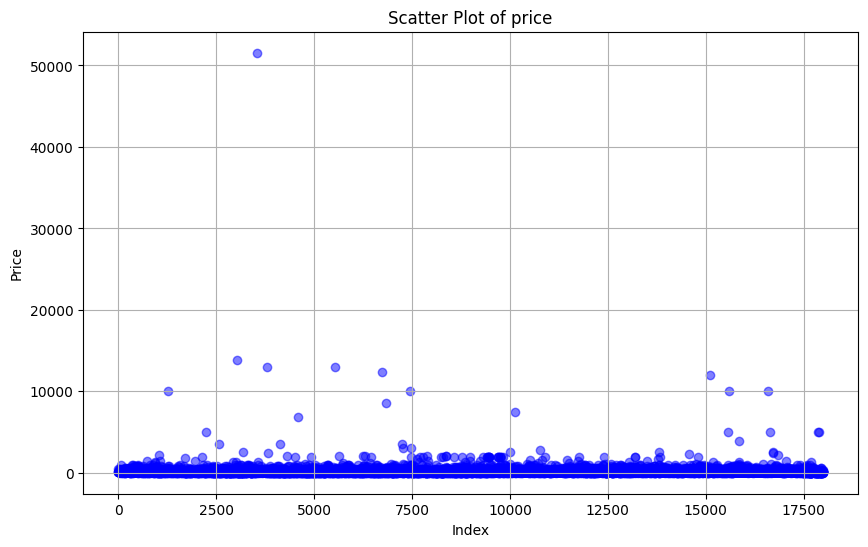

In [216]:
import matplotlib.pyplot as plt

# Assuming listingsDF is your DataFrame
# Replace 'price' with the actual column name in your DataFrame
price_column = 'price'

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(listingDF.index, listingDF[price_column], alpha=0.5, color='blue')
plt.title(f'Scatter Plot of {price_column}')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [217]:

# Drop rows where the price is above 50000

listingDF['price'] = pd.to_numeric(listingDF['price'], errors='coerce')

In [218]:
listingDF['property_type'].value_counts()

Entire condo                        3666
Entire rental unit                  3435
Private room in home                2767
Entire home                         2643
Private room in rental unit          935
                                    ... 
Private room in castle                 1
Floor                                  1
Shared room in bed and breakfast       1
Private room in cottage                1
Earthen home                           1
Name: property_type, Length: 62, dtype: int64

Number of property types: 62

Entire condo                        3666
Entire rental unit                  3435
Private room in home                2767
Entire home                         2643
Private room in rental unit          935
                                    ... 
Private room in castle                 1
Floor                                  1
Shared room in bed and breakfast       1
Private room in cottage                1
Earthen home                           1
Name: property_type, Length: 62, dtype: int64


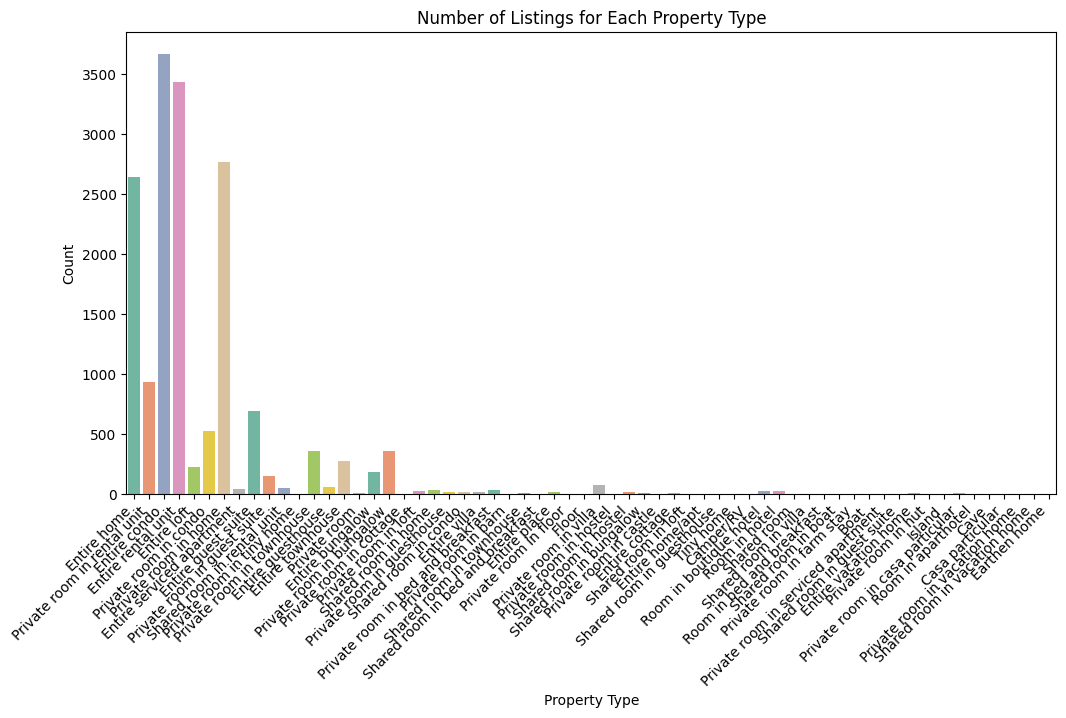

In [219]:
# Display the number of property types
print("Number of property types:", len(listingDF["property_type"].unique()))
print()

# Display the count of each property type
print(listingDF["property_type"].value_counts())

# Create a vertical bar chart with Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(x="property_type", data=listingDF, palette="Set2")
plt.title("Number of Listings for Each Property Type")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotating x-axis labels for better readability
plt.show()

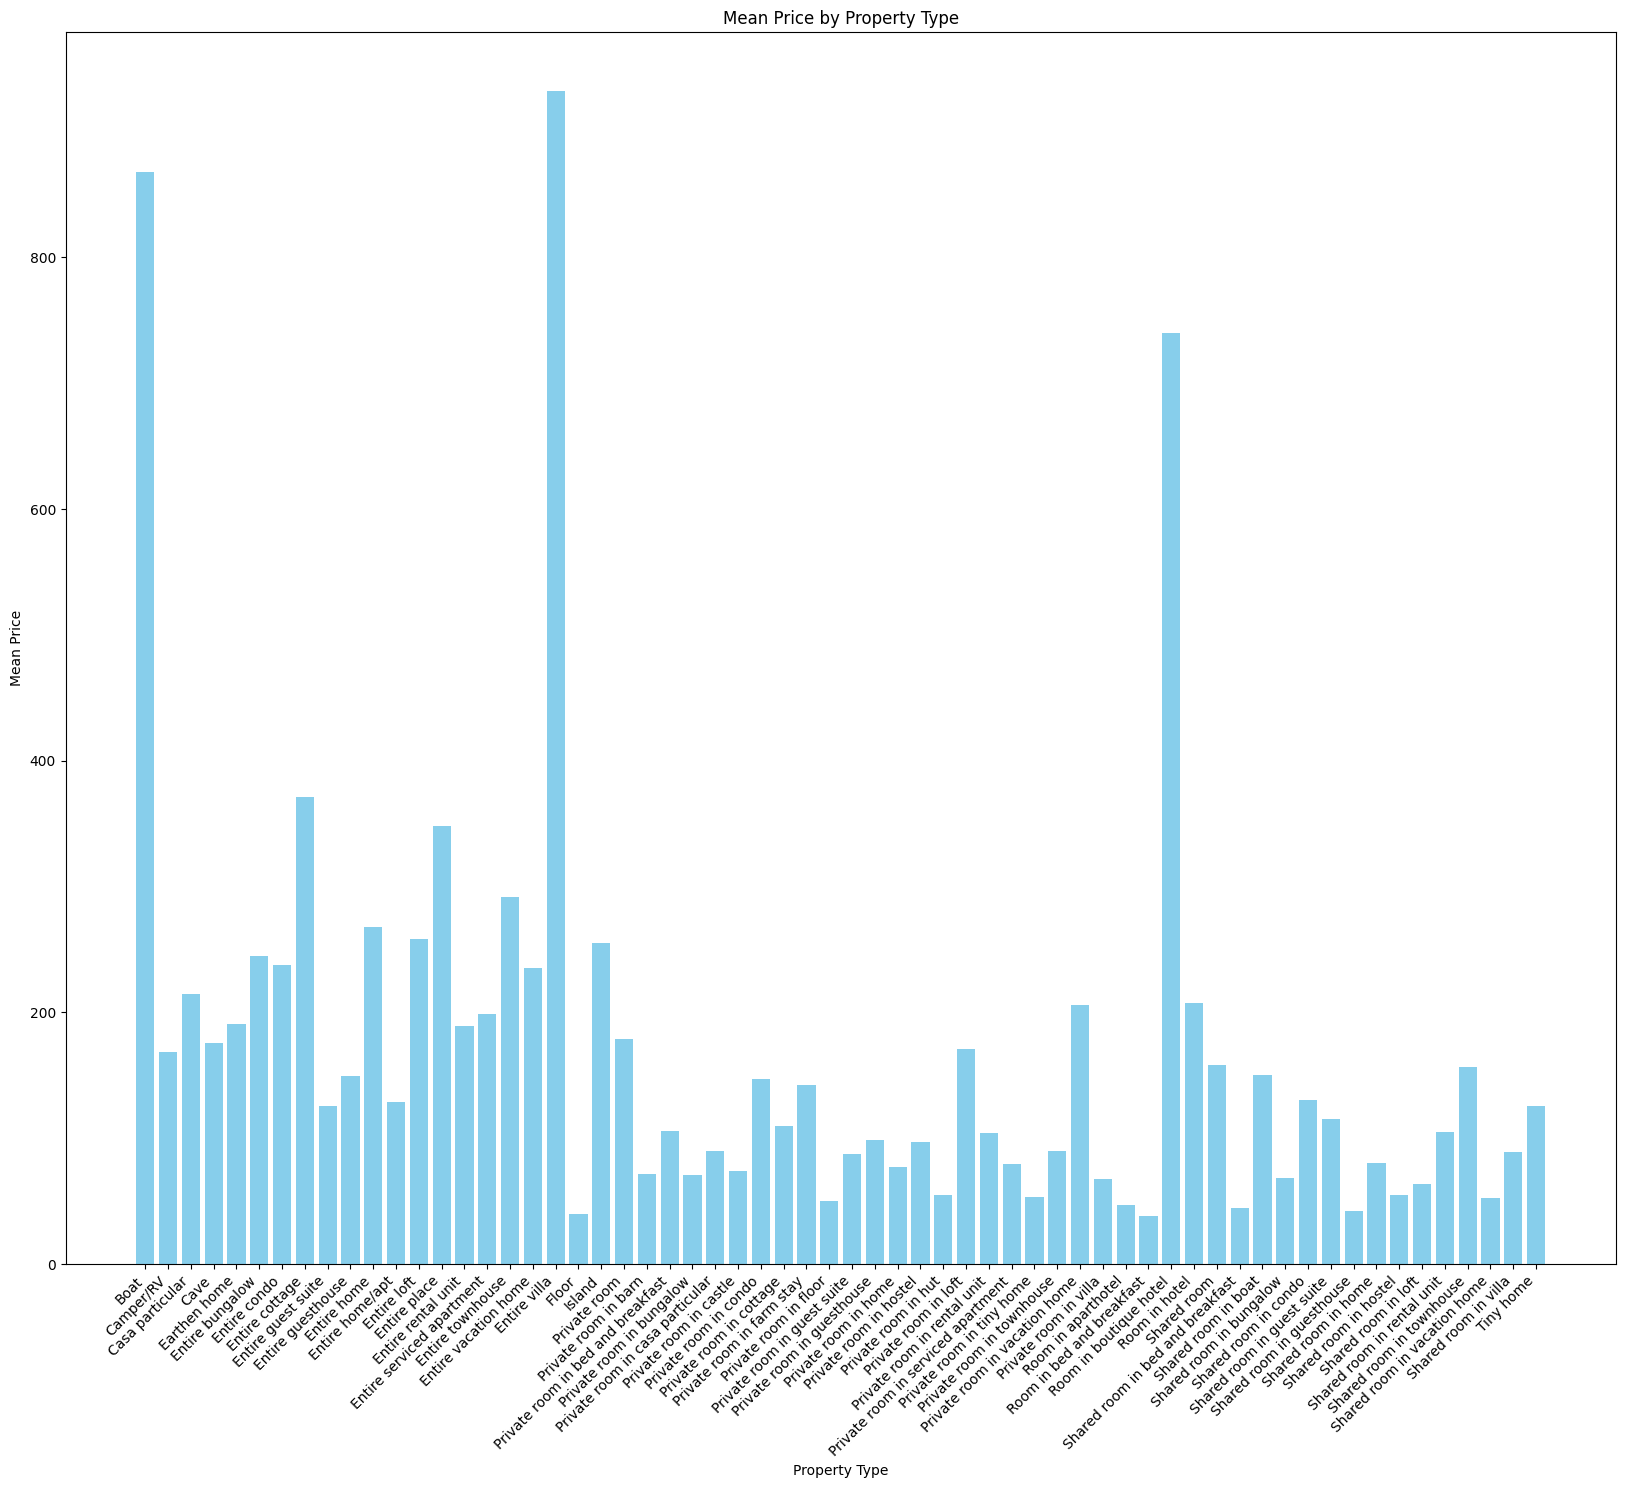

In [222]:
# Group by property_type and calculate the mean price for each type
mean_price_by_type = listingDF.groupby('property_type')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(20,16))
plt.bar(mean_price_by_type['property_type'], mean_price_by_type['price'], color='skyblue')
plt.xlabel('Property Type')
plt.ylabel('Mean Price')
plt.title('Mean Price by Property Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [190]:

# Grouping by 'property_type' and 'room_type' and calculating the mean price for each group
roomProperty_DF = listingDF.groupby(['property_type', 'room_type']).price.mean()

# Resetting the index to turn the grouped result into a DataFrame
roomProperty_DF = roomProperty_DF.reset_index()

# Sorting the DataFrame based on the 'price' column in descending order
roomProperty_DF = roomProperty_DF.sort_values('price', ascending=[0])

# Displaying the top rows of the DataFrame
roomProperty_DF.head()


,property_type,room_type,price
60,villa,Entire home/apt,932.047619
0,Boat,Entire home/apt,868.000000
16,boutique hotel,Private room,739.666667
25,cottage,Entire home/apt,370.857143
47,place,Entire home/apt,347.777778


Analysisng Listings based on room types

Entire home/apt    11313
Private room        5363
Shared room          151
Hotel room             2
Name: room_type, dtype: int64


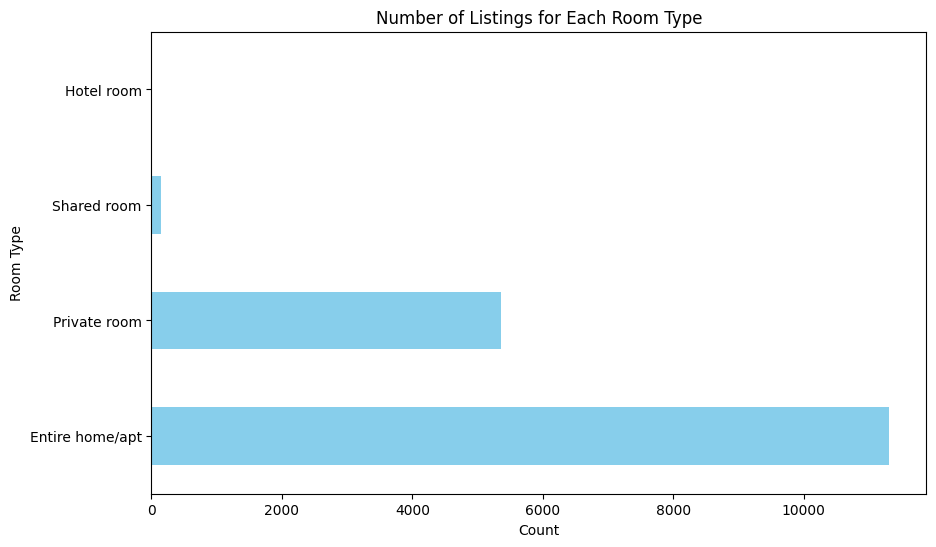

In [191]:
# Display the count of each room type
print(listingDF["room_type"].value_counts())

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
listingDF["room_type"].value_counts().plot(kind="barh", color="skyblue")
plt.title("Number of Listings for Each Room Type")
plt.xlabel("Count")
plt.ylabel("Room Type")
plt.show()


As it can be seen from the countplot, most of the listings are entire home/apt with private rooms being second and shared rooms being the least.

#Anaylzing the listings based on the number of bedrooms.

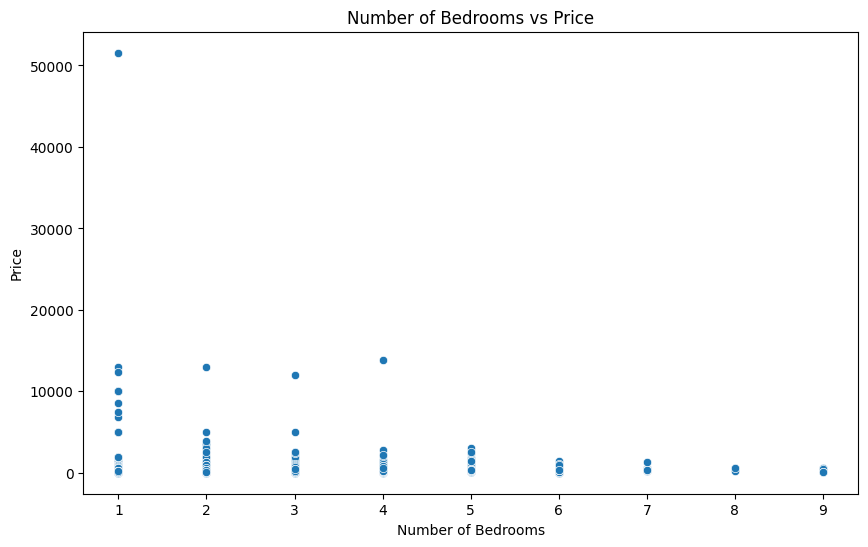

In [192]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=listingDF)
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

Number of the bedrooms is not seeming to follow a constant trend with price. Surprisingly, the listings with 1 bedrooms has a higher price than listings with 6 or more bedrooms

In [195]:
# Number of bedrooms
print("Number of bedrooms :", len(listingDF["bedrooms"].unique()))
print()
print("BedRms|Listings")
# Number of listings of each room type
print(listingDF["bedrooms"].value_counts())

Number of bedrooms : 9

BedRms|Listings
1.0    11235
2.0     3667
3.0     1333
4.0      413
5.0      121
6.0       41
7.0       10
8.0        5
9.0        4
Name: bedrooms, dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16829 entries, 0 to 17996
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      16829 non-null  int64  
 1   name                    16829 non-null  object 
 2   description             16829 non-null  object 
 3   longitude               16829 non-null  float64
 4   latitude                16829 non-null  float64
 5   instant_bookable        16829 non-null  object 
 6   neighborhood_overview   16829 non-null  object 
 7   neighbourhood_cleansed  16829 non-null  object 
 8   host_id                 16829 non-null  int64  
 9   host_name               16829 non-null  object 
 10  host_since              16829 non-null  object 
 11  host_response_time      16829 non-null  object 
 12  review_scores_rating    16829 non-null  float64
 13  property_type           16829 non-null  object 
 14  room_type               16829 non-null

In [200]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
nltk.download('wordnet')
# Download the necessary resource
nltk.download('punkt')

# Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenitiesDF = listingDF[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


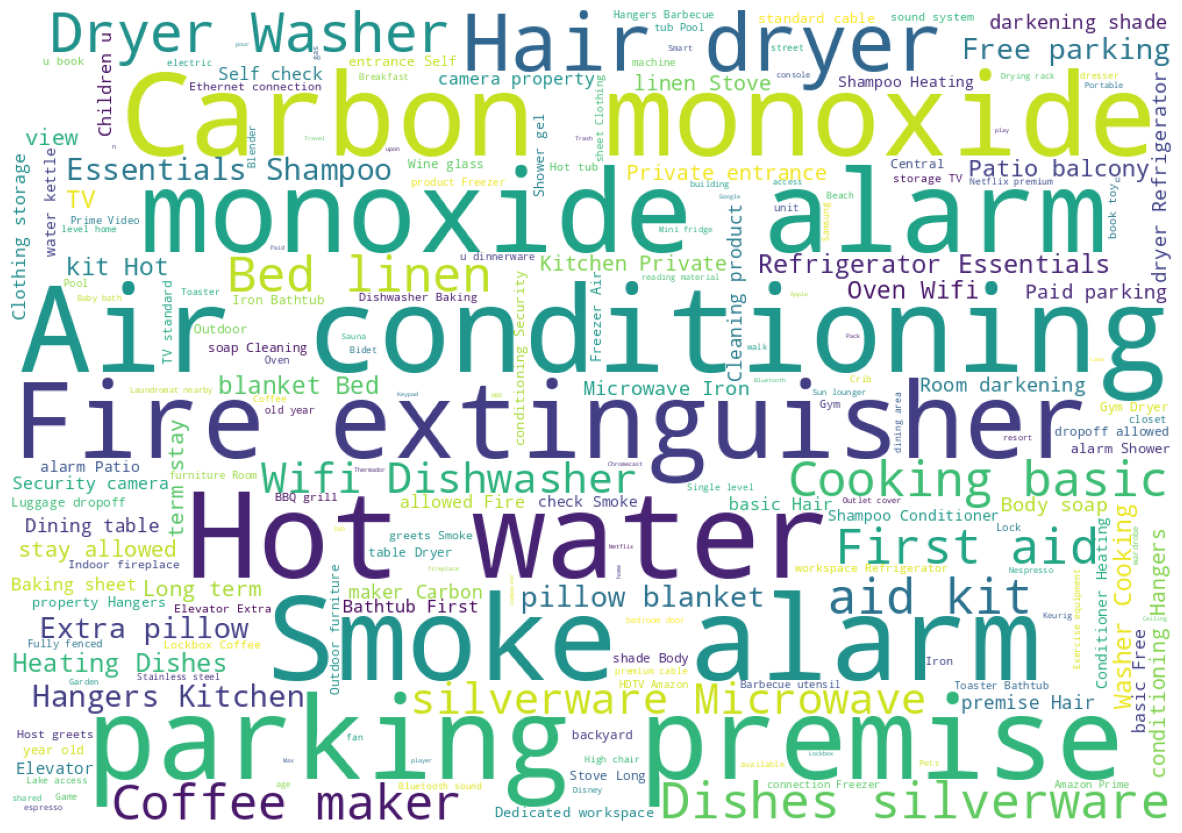

In [201]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From all the analysis above, we can say a few things:

Type of room for the listing has a great influence in the price. Most hosts list their entire property. Moreover, entire property lisitings cost the most.

The type of property also influences price. Although the highest price is fetched by boat houses, there are very few of them. The most common properties are entire rental unit and entire condos since these are the 2 types of properties that most hosts list and they do fetch a high price provided the entire property is listed as mentioned in (1).


Finally, there are certain ammenities such as: 'Air conditioning', 'Carbon monoxide alarm', 'Hot water', 'Parking premises', 'smoke alarm' etc. that most expensive listings also provide. The ammenities will be further explored in the machine learning parts of the project